Note that we have manually saved the excel files as csv files, for both the training and the testing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression

# autoload self-written modules
%load_ext autoreload
%autoreload 2
import group as gp

train = pd.read_csv('../data/train.csv')
train['XC'] = pd.factorize(train['XC'], sort=True)[0]
X = train.drop(columns = ['y']).values
X = np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1), X), axis=1)
y = train['y'].values

## Fit a Logistic Model with Sparse Grouping Pursuit

In [2]:
m = gp.LogitGroupingPursuit(x=X, y=y, lambda_par = 1.0 / X.shape[0])

Plot the coefficients. 

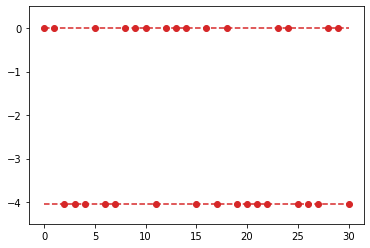

In [3]:
f = plt.figure()
plt.ylim(-4.5, 0.5)
plt.plot(range(31), (m[0])[1:], 'o', color=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392))
plt.plot(np.linspace(0,30,100), np.zeros(100),  '--', color=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392))
plt.plot(np.linspace(0,30,100), np.repeat(m[0][3],100),  '--', color=(0.8392156862745098, 0.15294117647058825, 0.1568627450980392))
plt.show()
f.savefig('../images/group_coef.pdf')

## Compare with L1 Logistic Model

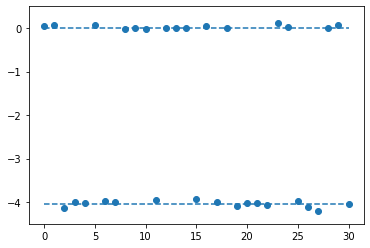

In [4]:
m2 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200, C=0.6).fit(X=train.drop(columns = ['y']), y=train['y'])
f = plt.figure()
plt.ylim(-4.5, 0.5)
plt.plot(range(31), m2.coef_.reshape(31), 'o', color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765))
plt.plot(np.linspace(0,30,100), np.zeros(100),  '--', color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))
plt.plot(np.linspace(0,30,100), np.repeat(m[0][3],100),  '--', color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))
plt.show()
f.savefig('../images/ungroup_coef.pdf')